In [1]:
#pip install beautifulsoup4

In [2]:
from bs4 import BeautifulSoup
import requests #HTTP操作用

/Users/teraokatakumi/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# アクセスしたいWebサイトのURL
url = 'https://www.toshin.com/weather/detail?id=61759'

# Webサーバにリクエストを出す．レスポンスを変数に格納しておく
r = requeｓts.get(url)

In [4]:
print(r)
print(f'リクエスト：{r.request}') # 自分の出したリクエスト情報
print(f'リクエストヘッダー：{r.request.headers}') # リクエストヘッダー

print(f'HTTPステータスコード：{r.status_code}') # HTTPステータスコード
print(f'HTTPステータスメッセージ：{r.reason}') # HTTPステータスメッセージ

print(f'レスポンスヘッダー：{r.headers}') # レスポンスヘッダー
print(f'レスポンスのコンテンツ：{r.text}') # コンテンツ（HTMLソース）

<Response [200]>
リクエスト：<PreparedRequest [GET]>
リクエストヘッダー：{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}
HTTPステータスコード：200
HTTPステータスメッセージ：OK
レスポンスヘッダー：{'Date': 'Tue, 16 Jan 2024 06:07:25 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-Powered-By': 'PHP/7.2.4', 'Vary': 'User-Agent, Accept-Encoding', 'CF-Cache-Status': 'HIT', 'Age': '3024', 'Last-Modified': 'Tue, 16 Jan 2024 05:17:01 GMT', 'Server': 'cloudflare', 'CF-RAY': '84642d99ce8b2095-NRT', 'Content-Encoding': 'gzip'}
レスポンスのコンテンツ：<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" lang="ja" xml:lang="ja">
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# article: http://ogp.me/ns/article#">
<meta property="og:site_name" content="【東進】全国学校のお天気 14日間の1時間ごとのピンポイント天気予報・90日間(3ヶ月)天気

In [5]:
url = 'https://www.toshin.com/weather/detail?id=61759'

r = requests.get(url)

In [6]:
print(r.text)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" lang="ja" xml:lang="ja">
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# article: http://ogp.me/ns/article#">
<meta property="og:site_name" content="【東進】全国学校のお天気 14日間の1時間ごとのピンポイント天気予報・90日間(3ヶ月)天気予報 -Toshin.com 天気情報 - 全国75,000箇所以上！">
<meta property="og:title" content="【東進】全国学校のお天気 14日間の1時間ごとのピンポイント天気予報・90日間(3ヶ月)天気予報 -Toshin.com 天気情報 - 全国75,000箇所以上！">
<meta property="og:description" content="日本初！90日先の天気が分かる！さらに14日先なら1時間おきの天気・気温・降水確率・降水量・湿度・風向き・風速までピンポイントで分かる！！他にも会員登録で「天気メール」やよく見る地点の「My天気登録」など、さまざまな便利な機能を利用することができます。">
<meta property="og:type" content="article">
<meta property="og:url" content="https://www.toshin.com/weather/detail?id=61759">
<meta property="og:image" content="https://www.toshin.com/weather/pc/img/OGP.png">
<meta property="fb:app_id" content="145415862480869" />
<meta name="twitter:card" content="

In [7]:
soup = BeautifulSoup(r.text, "html.parser")

In [8]:
elems = soup.select('#weather_box3_1 > div > table > tbody > tr:nth-of-type(5)')   

In [9]:
elems2 = soup.select('#weather_box3_1 > div > table > tbody > tr:nth-of-type(1)')   

In [10]:
elems2[0]

<tr> <td>0時</td> <td>1時</td> <td>2時</td> <td>3時</td> <td>4時</td> <td>5時</td> <td>6時</td> <td>7時</td> <td>8時</td> <td>9時</td> <td>10時</td> <td>11時</td> <td>12時</td> <td>13時</td> <td>14時</td> <td>15時</td> <td>16時</td> <td>17時</td> <td>18時</td> <td>19時</td> <td>20時</td> <td>21時</td> <td>22時</td> <td>23時</td> </tr>

In [11]:
cell_texts2 = [cell.get_text(strip=True) for cell in elems2[0].find_all('td')]

print(cell_texts2)

['0時', '1時', '2時', '3時', '4時', '5時', '6時', '7時', '8時', '9時', '10時', '11時', '12時', '13時', '14時', '15時', '16時', '17時', '18時', '19時', '20時', '21時', '22時', '23時']


In [12]:
elems[0]

<tr> <td> 66 </td> <td> 70 </td> <td> 72 </td> <td> 67 </td> <td> 57 </td> <td> 59 </td> <td> 64 </td> <td> 64 </td> <td> 67 </td> <td> 56 </td> <td> 49 </td> <td> 44 </td> <td> 39 </td> <td> 39 </td> <td> 44 </td> <td> 44 </td> <td> 45 </td> <td> 50 </td> <td> 51 </td> <td> 51 </td> <td> 76 </td> <td> 74 </td> <td> 76 </td> <td> 71 </td> </tr>

In [13]:
cell_texts = [cell.get_text(strip=True) for cell in elems[0].find_all('td')]

print(cell_texts)

['66', '70', '72', '67', '57', '59', '64', '64', '67', '56', '49', '44', '39', '39', '44', '44', '45', '50', '51', '51', '76', '74', '76', '71']


In [14]:
import sqlite3

In [15]:
con = sqlite3.connect('weather_data.db')
cur = con.cursor()
sql_create_table_cars = 'CREATE TABLE climate_table(id INTEGER PRIMARY KEY AUTOINCREMENT, time text, hu int);'
cur.execute(sql_create_table_cars)
con.commit()
con.close()

In [16]:
def insert_data(date,hu):
    con = sqlite3.connect('weather_data.db')
    cur = con.cursor()
    sql = f"INSERT INTO climate_table (time , hu) VALUES (?,?)"
    data_list = [date,hu]
    cur.execute(sql, data_list)
    con.commit()
    con.close()

In [17]:
elems = soup.select('#weather_box3_1 > div > table > tbody > tr:nth-of-type(5)')  
elems2 = soup.select('#weather_box3_1 > div > table > tbody > tr:nth-of-type(1)')   
date_list = [cell.get_text(strip=True) for cell in elems2[0].find_all('td')]
hu_list = [cell.get_text(strip=True) for cell in elems[0].find_all('td')]

def insert_data_all(date_list, hu_list):
    for i in range(len(date_list)):
        insert_data(date_list[i], hu_list[i])

insert_data_all(date_list, hu_list)

In [22]:
con = sqlite3.connect('weather_data.db')
cur = con.cursor()
sql_create_table = 'CREATE TABLE local_data_table(id INTEGER PRIMARY KEY AUTOINCREMENT, time text, hu int);'
cur.execute(sql_create_table)
con.commit()
con.close()

OperationalError: table local_data_table already exists

In [23]:
def insert_data2(date,hu):
    con = sqlite3.connect('weather_data.db')
    cur = con.cursor()
    sql = f"INSERT INTO local_data_table (time , hu) VALUES (?,?)"
    data_list = [date,hu]
    cur.execute(sql, data_list)
    con.commit()
    con.close()

In [24]:
insert_data2('0時',45)
insert_data2('1時',47)
insert_data2('2時',46)
insert_data2('3時',46)
insert_data2('4時',46)
insert_data2('5時',45)
insert_data2('6時',45)
insert_data2('7時',47)
insert_data2('8時',49)
insert_data2('9時',43)
insert_data2('10時',44)
insert_data2('11時',41)
insert_data2('12時',45)
insert_data2('13時',47)
insert_data2('14時',43)
insert_data2('15時',44)
insert_data2('16時',46)
insert_data2('17時',47)
insert_data2('18時',47)
insert_data2('19時',58)
insert_data2('20時',55)
insert_data2('21時',49)
insert_data2('22時',47)
insert_data2('23時',45)




In [27]:
import sqlite3
import matplotlib.pyplot as plt

# データベースからデータを取得する関数
def fetch_data_from_db(db_path, table_name):
    conn = sqlite3.connect(db_path)
    cur = conn.cursor()
    cur.execute(f'SELECT timestamp, temperature FROM {table_name}')
    data = cur.fetchall()
    conn.close()
    return data

# データベースからデータを取得
data_table1 = fetch_data_from_db('weather_data.db', 'climate_table')
data_table2 = fetch_data_from_db('weather_data.db', 'local_data_table')

# グラフの作成
timestamps_table1, temperatures_table1 = zip(*data_table1)
timestamps_table2, temperatures_table2 = zip(*data_table2)

plt.plot(timestamps_table1, temperatures_table1, label='climate_table')
plt.plot(timestamps_table2, temperatures_table2, label='local_data_table')

plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Comparison of Temperatures between climate_table and local_data_table')
plt.legend()
plt.show()


OperationalError: no such column: timestamp

/Users/teraokatakumi/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


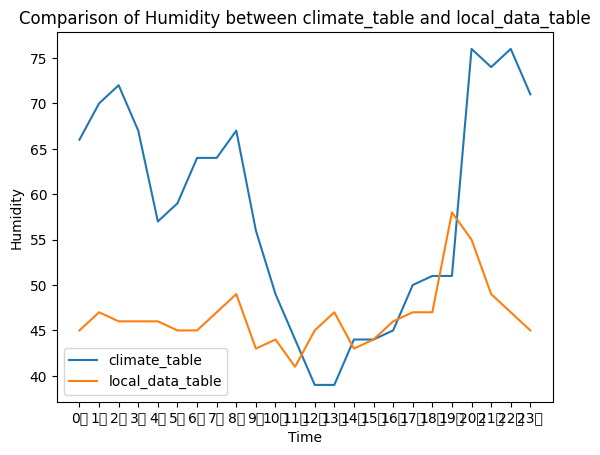

In [30]:
import sqlite3
import matplotlib.pyplot as plt

# データベースからデータを取得する関数
def fetch_data_from_db(db_path, table_name):
    conn = sqlite3.connect(db_path)
    cur = conn.cursor()
    cur.execute(f'SELECT time, hu FROM {table_name}')
    data = cur.fetchall()
    conn.close()
    return data

# データベースからデータを取得
data_table1 = fetch_data_from_db('weather_data.db', 'climate_table')
data_table2 = fetch_data_from_db('weather_data.db', 'local_data_table')

# グラフの作成
timestamps_table1, temperatures_table1 = zip(*data_table1)
timestamps_table2, temperatures_table2 = zip(*data_table2)

plt.plot(timestamps_table1, temperatures_table1, label='climate_table')
plt.plot(timestamps_table2, temperatures_table2, label='local_data_table')

plt.xlabel('Time')
plt.ylabel('Humidity')
plt.title('Comparison of Humidity between climate_table and local_data_table')
plt.legend()
plt.show()